In [1]:
import matplotlib.pyplot as plt

In [2]:
# parses an .xvg file, extracting time and value data, optionally converting time units
def read_xvg(filename, convert_time=False):
    with open(filename, 'r') as file:
        data = []
        for line in file:
            if line.startswith('#') or line.startswith('@'):
                continue
            parts = line.split()
            time = float(parts[0])
            value = float(parts[1])
            if convert_time:
                time /= 1000 
            data.append((time, value))
    return zip(*data)

In [3]:
# plots data from multiple files with customization options for appearance and annotations
def plot_data(files, colors, xlabel, ylabel, title, figsize=(10, 6), 
              xlim_adjust=1, ylim_min=0, ylim_adjust=0.05, 
              legend_loc='upper right', legend_bbox=(1, 1), 
              linewidth=0.85, vlines=None, shade=None, 
              shade_color='pink', shade_alpha=0.3, 
              convert_time=False):
    data = {}

    for label, filename in files.items():
        time, value = read_xvg(filename, convert_time=convert_time)
        data[label] = (time, value)

    plt.figure(figsize=figsize)
    for label, (x, y) in data.items():
        plt.plot(x, y, label=label, color=colors[label], linewidth=linewidth)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    legend = plt.legend(loc=legend_loc, bbox_to_anchor=legend_bbox, frameon=False) 
    for line in legend.get_lines():
        line.set_linewidth(3.0)

    # setting axis limits with small margins
    plt.xlim(min(x) - xlim_adjust, max(x) + xlim_adjust) 
    y_min, y_max = plt.ylim()
    plt.ylim(ylim_min, y_max + (y_max - y_min) * ylim_adjust) 

    # adding vertical lines
    if vlines:
        for vline in vlines:
            plt.axvline(x=vline, color='grey', linestyle='--', linewidth=1)
    
    # pink shade
    if shade:
        plt.fill_betweenx([shade[2], shade[3]], shade[0], shade[1], color=shade_color, alpha=shade_alpha)

    # adding grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()


In [4]:
from file_paths import rmsd_files, rmsf_files, rg_files

In [5]:
colors = {
    "WT": "#e6194b",
    "S718C": "#3cb44b",
    "P720R": "#ffe119",
    "P720Q": "#4363d8", 
    "S719del": "#f58231", 
    "PD720-721R": "#911eb4",
    "T739A": "#42d4f4"
}


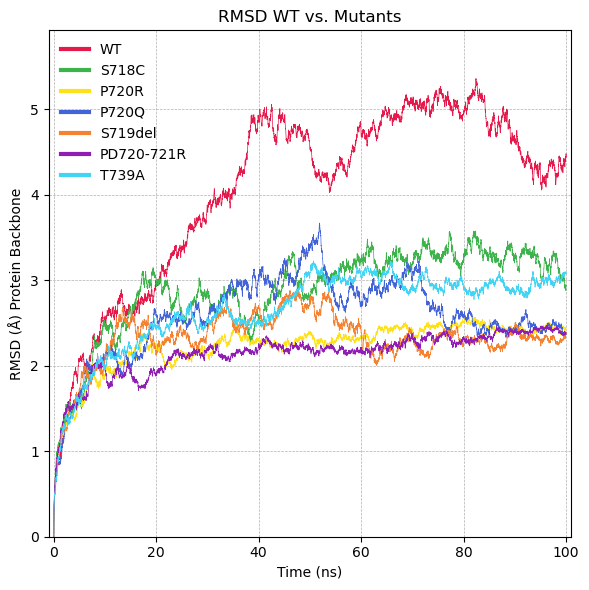

In [6]:
# RMSD
plot_data(
    rmsd_files, colors,
    xlabel='Time (ns)', ylabel='RMSD (Å) Protein Backbone',
    title='RMSD WT vs. Mutants', figsize=(6, 6),
    xlim_adjust=1, ylim_min=0, ylim_adjust=0.05,
    legend_loc='upper left', legend_bbox=(0, 1),
    linewidth=0.5
)


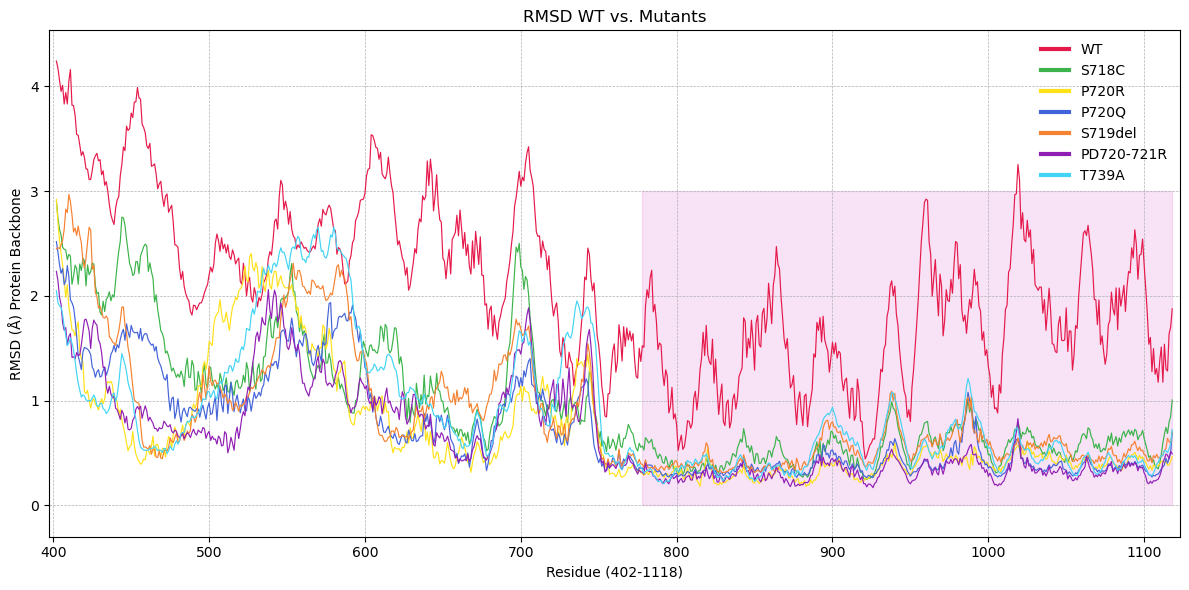

In [9]:
# RMSF
plot_data(
    rmsf_files, colors,
    xlabel='Residue (402-1118)', ylabel='RMSD (Å) Protein Backbone',
    title='RMSD WT vs. Mutants', figsize=(12, 6),
    xlim_adjust=5, ylim_min=-0.3, ylim_adjust=0.02,
    legend_loc='upper right', legend_bbox=(1, 1),
    shade=(778, 1118, 0, 3),
    shade_color='orchid', shade_alpha=0.2
)

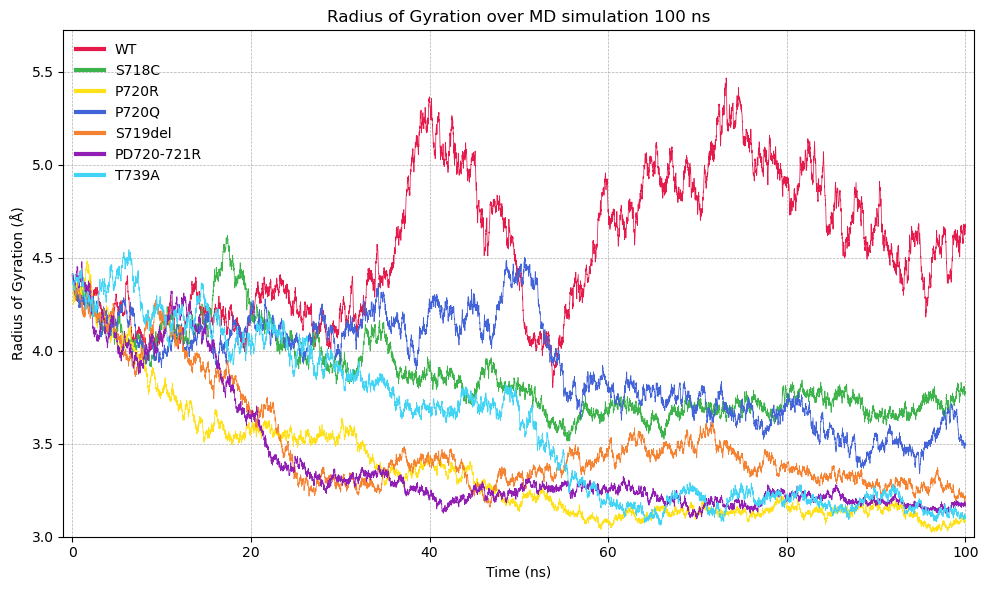

In [8]:
# RG
plot_data(
    rg_files, colors,
    xlabel='Time (ns)', ylabel='Radius of Gyration (Å)',
    title='Radius of Gyration over MD simulation 100 ns', figsize=(10, 6),
    xlim_adjust=1, ylim_min=3, ylim_adjust=0.05,
    legend_loc='upper left', legend_bbox=(0, 1),
    linewidth=0.55, convert_time=True
)